In [1]:
!pip install selenium

In [18]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
import time
warnings.filterwarnings('ignore')

In [44]:
driver = webdriver.Chrome(r"C:\Users\gokula krishnan\Downloads\chromedriver_win32\chromedriver.exe")

# Question 1

In [45]:
url='https://www.amazon.in/'
driver.get(url)

In [46]:
search_bar=driver.find_element_by_xpath('/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search_bar.send_keys('cricket bat')

In [47]:
search_btn=driver.find_element_by_xpath('/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search_btn.click()

# Question 2

In [48]:
page_urls_tags=driver.find_elements_by_xpath('//span[@class="s-pagination-strip"]//a')

page_urls=[]
for i in page_urls_tags:
    page_urls.append(i.get_attribute('href'))
page_urls

['https://www.amazon.in/s?k=cricket+bat&page=2&qid=1632609705&ref=sr_pg_2',
 'https://www.amazon.in/s?k=cricket+bat&page=3&qid=1632609705&ref=sr_pg_3',
 'https://www.amazon.in/s?k=cricket+bat&page=2&qid=1632609705&ref=sr_pg_1']

In [52]:
product_urls_tags=driver.find_elements_by_xpath('//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-4"]//a')

product_urls=[]
for i in page_urls[:1]:
    for j in product_urls_tags:
        product_urls.append(j.get_attribute('href'))
product_urls

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A05597593IWNVT6F7YE6F&url=%2FTrex-Hitter-1000-Machine-Cricket%2Fdp%2FB09F3NWJRM%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dcricket%2Bbat%26qid%3D1632609705%26sr%3D8-1-spons%26psc%3D1&qualifier=1632609705&id=2127981306091147&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A05599153SSKYNGQ776N1&url=%2FTrex-Thunder-1000-Poplar-Cricket%2Fdp%2FB09FGG1S7Y%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3Dcricket%2Bbat%26qid%3D1632609705%26sr%3D8-2-spons%26psc%3D1&qualifier=1632609705&id=2127981306091147&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0476529GHBSEFYJ7JC0&url=%2FElevar-Kashmir-Willow-Season-Tennis%2Fdp%2FB07TNJ1DZG%2Fref%3Dsr_1_3_sspa%3Fdchild%3D1%26keywords%3Dcricket%2Bbat%26qid%3D1632609705%26sr%3D8-3-spons%26psc%3D1&qualifier=1632609705&

In [50]:
len(product_urls)

68

In [53]:
names=[]

for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        name=driver.find_element_by_xpath('//h1[@class="a-size-large a-spacing-none"]')
        names.append(name.text)
    except:
        names.append('---')

In [54]:
price=[]

for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        price_tag=driver.find_element_by_xpath('//span[@id="priceblock_ourprice"]')
        price.append(price_tag.text)
    except:
        price.append('---')

In [55]:
brands=[]

for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        brand=driver.find_element_by_xpath('//div[@class="a-section a-spacing-none"]//a')
        brands.append(brand.text)
    except:
        brands.append('---')

ratings=[]

for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        rating=driver.find_element_by_xpath('//span[@class="a-size-base a-nowrap"]')
        ratings.append(rating.text)
    except:
        ratings.append('---')
        
num_ratings=[]

for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        numbers=driver.find_element_by_xpath('//div[@data-hook="total-review-count"]//span')
        num_ratings.append(numbers.text)
    except:
        num_ratings.append('---')
        

delivery=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        dil=driver.find_element_by_xpath('//div[@id="ddmDeliveryMessage"]//b')
        delivery.append(dil.text)
    except:
        delivery.append('---')

RetExch=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        ret=driver.find_element_by_xpath('//div[@id="RETURNS_POLICY"]//a')
        RetExch.append(ret.text)
    except:
        RetExch.append('---')

In [56]:
Cricket_Bats=pd.DataFrame()
Cricket_Bats['Brand Name']=brands
Cricket_Bats['Name of the Product']=names
Cricket_Bats['Rating']=ratings
Cricket_Bats['Number of Ratings']=num_ratings
Cricket_Bats['Price']=price
Cricket_Bats['Return/Exchange']=RetExch
Cricket_Bats['Expected Delivery']=delivery
Cricket_Bats['Product URL']=product_urls

Cricket_Bats.head()

,Brand Name,Name of the Product,Rating,Number of Ratings,Price,Return/Exchange,Expected Delivery,Product URL
0,Visit the Trex Store,Trex Hitter 1000 The Run Machine Poplar Willow...,5 out of 5,1 global rating,₹499.00,10 Days Returnable,"Sunday, Oct 3",https://www.amazon.in/gp/slredirect/picassoRed...
1,Visit the Trex Store,Trex Thunder 1000 Poplar Willow Cricket Bat (1...,---,---,₹549.00,10 Days Returnable,"Sunday, Oct 3",https://www.amazon.in/gp/slredirect/picassoRed...
2,Visit the ELEVAR Store,Elevar Kashmir - Kashmir Willow Bat for Season...,3.9 out of 5,162 global ratings,"₹3,250.00",10 day Refund/Replacement,"Thursday, Sep 30",https://www.amazon.in/gp/slredirect/picassoRed...
3,Visit the Trex Store,Trex Bolt 1000 Designer Scoop Poplar Willow Cr...,---,---,₹699.00,10 Days Returnable,"Sunday, Oct 3",https://www.amazon.in/gp/slredirect/picassoRed...
4,Brand: GRS,GRS Kids Zone Popular Willow Cricket Bat with ...,4 out of 5,186 global ratings,₹429.00,10 day Refund/Replacement,Oct 3 - 4,https://www.amazon.in/GRS-Popular-Willow-Crick...


# Question 3

In [57]:
driver = webdriver.Chrome(r"C:\Users\gokula krishnan\Downloads\chromedriver_win32\chromedriver.exe")

In [58]:
url='https://images.google.com/?gws_rd=ssl'
driver.get(url)

In [59]:
search_bar=driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/form/div[1]/div[1]/div[1]/div/div[2]/input')
search_bar.send_keys('fruits')

In [60]:
search_btn=driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/form/div[1]/div[1]/div[1]/button/div')
search_btn.click()

In [61]:
fruit_tags=driver.find_elements_by_xpath('//div[@class="bRMDJf islir"]//img')
fruit_tags

[<selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="239522d5-083e-4efa-8d1d-5c659f85aaaa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="ec697baa-1776-4ba5-9af1-aacc23428b9d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="6ad5d141-e326-42e2-8118-a76cfdd6236a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="9722f663-2d76-4651-8432-e650c2d071cd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="9405a497-1da7-4a7a-a091-f7cebe27b391")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="068cb55a-e185-43b7-b8cf-76f2db92f88d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="e25b18bc-57ce-468d-a98e-00

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
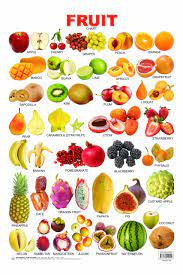
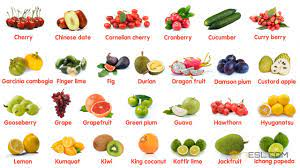
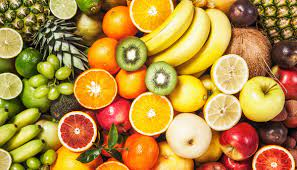
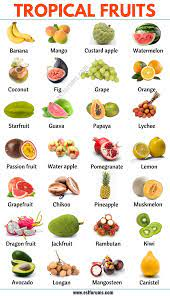
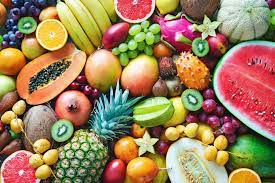
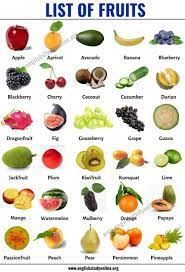
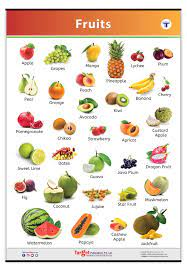
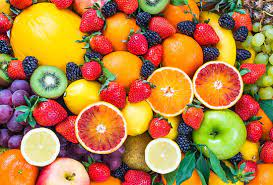
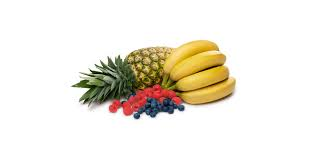
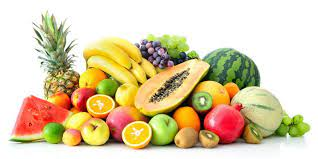
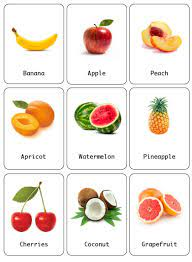
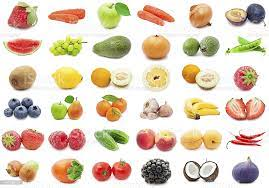
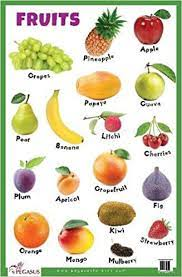
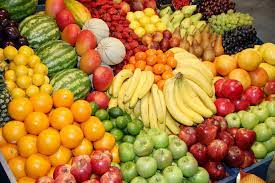
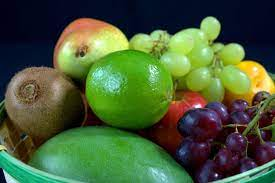
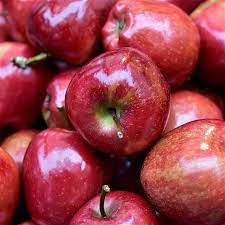
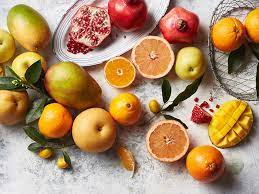
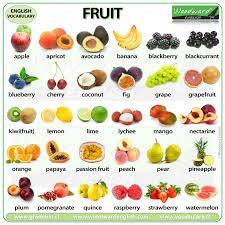
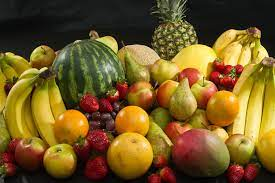
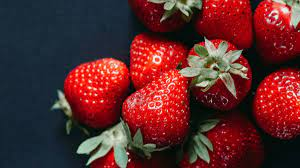

In [62]:
fruit_imgs=[]
for i in fruit_tags:
    fruit_imgs.append(i.get_attribute('src'))
fruit_imgs

In [63]:
len(fruit_imgs)

48

In [69]:
url = 'https://images.google.com/'
driver.get(url)
search_bar=driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/form/div[1]/div[1]/div[1]/div/div[2]/input')
search_bar.send_keys('cars')

In [70]:
search_btn=driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/form/div[1]/div[1]/div[1]/button/div')
search_btn.click()

In [71]:
cars_tags=driver.find_elements_by_xpath('//div[@class="bRMDJf islir"]//img')
cars_tags

[<selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="e6bdf6aa-913e-4081-b479-fe002c5f914b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="f04f5646-e27b-49c5-9472-d3c235d13cdd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="a2c4a979-e143-475e-9dec-75c91da70541")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="a64831ff-a1b4-420f-b81c-d866f1150295")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="8ad68179-6eb8-4192-9e57-47c87f81d046")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="56c44b18-73aa-4caa-acac-adc0642173cb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="3bee4704-aaa1-4a19-b541-90

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSIawJrQz1mK3AteC37Je-kMjgx1U1cptZ1WQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSu5mwXZ9iCFwuuXxVXai-VSUBnSrfA5FSqTg&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
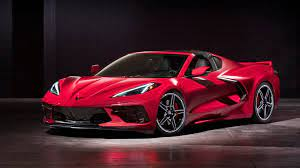
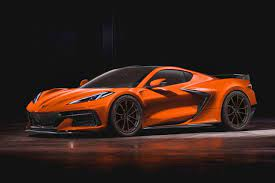
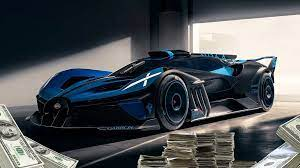
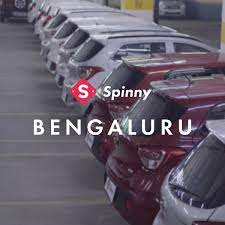
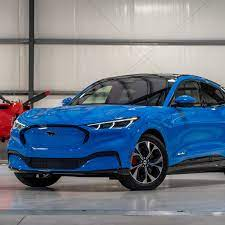
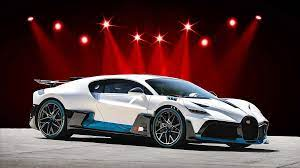
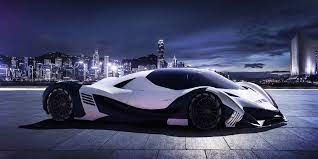
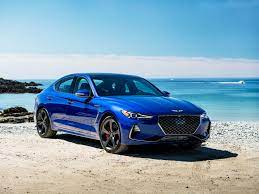
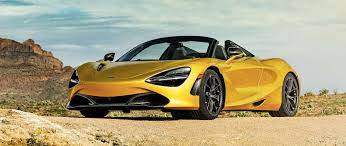
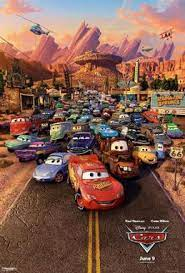
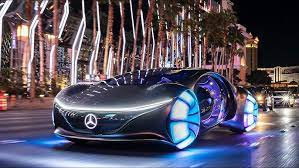
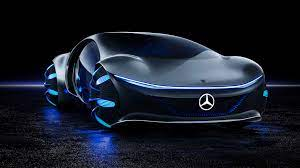
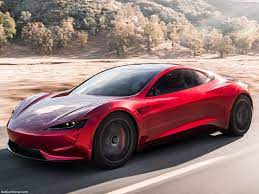
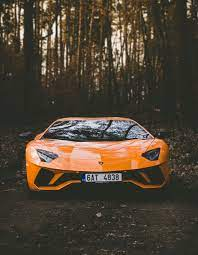
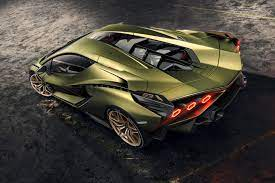
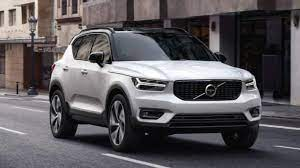
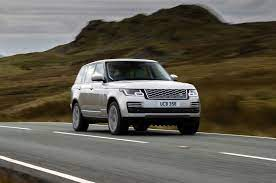
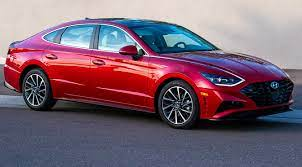
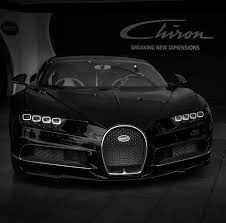
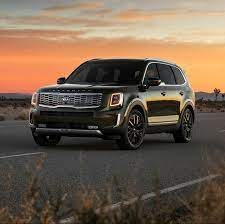

In [72]:
cars_imgs=[]
for i in cars_tags:
    cars_imgs.append(i.get_attribute('src'))
cars_imgs

In [73]:
url = 'https://images.google.com/'
driver.get(url)
search_bar=driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/form/div[1]/div[1]/div[1]/div/div[2]/input')
search_bar.send_keys('machine learning')

In [74]:
search_btn=driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/form/div[1]/div[1]/div[1]/button/div')
search_btn.click()

In [75]:
ml_tags=driver.find_elements_by_xpath('//div[@class="bRMDJf islir"]//img')
ml_tags

[<selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="1fd5fe04-7d6f-420e-b4ad-b74e8fca627b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="f5d45425-72d8-45dc-abdb-37e181d62166")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="b99be522-4969-4454-9ba1-dca73f127c88")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="f4865dfe-60aa-4b78-bd8f-c0c82545722c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="1f257996-23aa-464a-a019-49d431d02f14")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="e0dfd424-b5ed-4e1f-8f28-7fa76b288ba6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35f719bbaf9d5107af0098ae1f035c17", element="ca117588-a690-42e9-bc48-b3

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
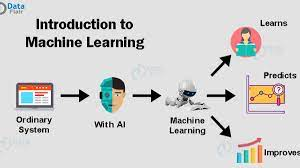
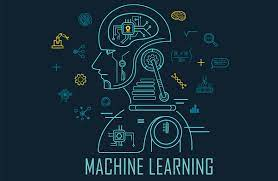
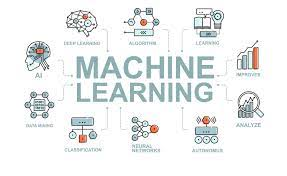
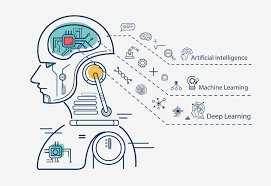
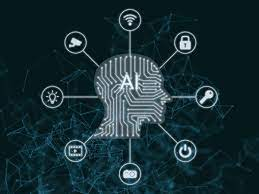
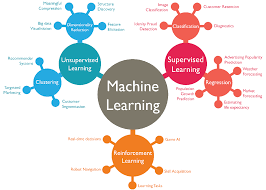
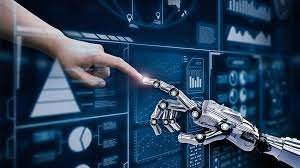
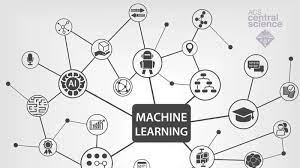
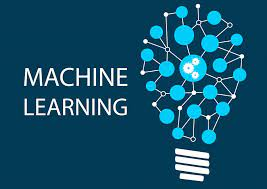
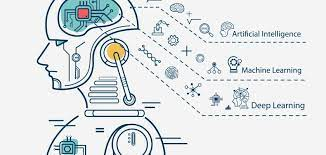
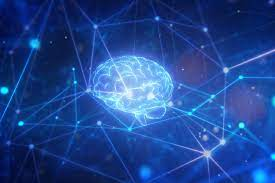
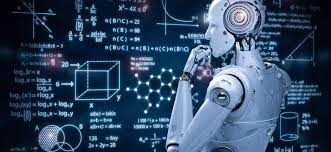
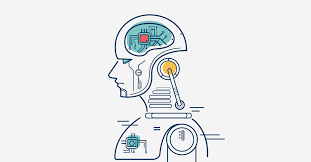
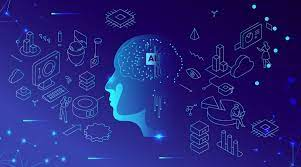
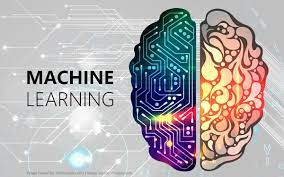
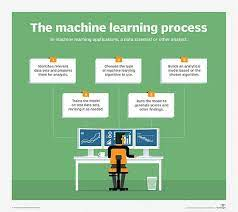
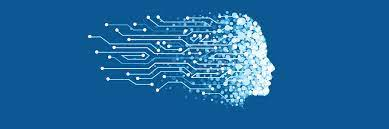
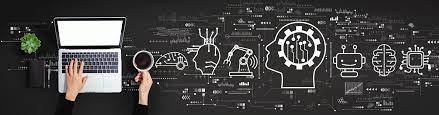
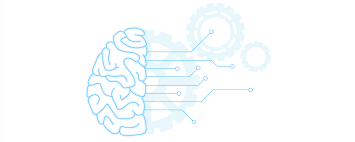
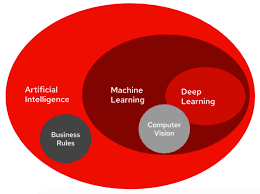

In [76]:
ml_imgs=[]
for i in ml_tags:
    ml_imgs.append(i.get_attribute('src'))
ml_imgs

# Question 4

In [77]:
driver = webdriver.Chrome(r"C:\Users\gokula krishnan\Downloads\chromedriver_win32\chromedriver.exe")

In [78]:
url='https://www.flipkart.com/'
driver.get(url)

In [79]:
search_bar=driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
search_bar.send_keys('redmi note 10')

In [81]:
search_btn=driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button')
search_btn.click()

In [82]:
product_urls_tags=driver.find_elements_by_xpath('//div[@class="_2kHMtA"]//a')

product_urls=[]
for i in product_urls_tags:
    product_urls.append(i.get_attribute('href'))
product_urls

['https://www.flipkart.com/redmi-note-10-shadow-black-64-gb/p/itm8a3f09e6da31b?pid=MOBGF47C73G8HMZX&lid=LSTMOBGF47C73G8HMZXUIVQZ1&marketplace=FLIPKART&q=redmi+note+10&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=deaeb6b4-fa07-41fc-b2d8-21fd1bc38e40.MOBGF47C73G8HMZX.SEARCH&ppt=hp&ppn=homepage&ssid=rugrca0shs0000001632613947318&qH=37347601431fd8b4',
 'https://www.flipkart.com/redmi-note-10-aqua-green-128-gb/p/itm23973bd36fd21?pid=MOBGF47CCGXUZPAP&lid=LSTMOBGF47CCGXUZPAPV8E1UU&marketplace=FLIPKART&q=redmi+note+10&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=deaeb6b4-fa07-41fc-b2d8-21fd1bc38e40.MOBGF47CCGXUZPAP.SEARCH&ppt=hp&ppn=homepage&ssid=rugrca0shs0000001632613947318&qH=37347601431fd8b4',
 'https://www.flipkart.com/redmi-note-10-frost-white-64-gb/p/itm23973bd36fd21?pid=MOBGF47CDJGHVX9Q&lid=LSTMOBGF47CDJGHVX9QFFMVCV&marketplace=FLIPKART&q=redmi+note+10&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=SEARCH&iid=dea

In [83]:
names=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        name_tag=driver.find_element_by_xpath('//h1[@class="yhB1nd"]//span')
        names.append(name_tag.text)
    except:
        names.append('---')
names

['REDMI Note 10 (Shadow Black, 64 GB)  (4 GB RAM)',
 'REDMI Note 10 (Aqua Green, 128 GB)  (6 GB RAM)',
 'REDMI Note 10 (Frost White, 64 GB)  (4 GB RAM)',
 'REDMI Note 10 (Aqua Green, 64 GB)  (4 GB RAM)',
 'REDMI Note 10 (Shadow Black, 128 GB)  (6 GB RAM)',
 'REDMI Note 10 (Frost White, 128 GB)  (6 GB RAM)',
 'REDMI Note 10 (Frost White, 64 GB)  (6 GB RAM)',
 'REDMI Note 10 (Frost White, 128 GB)  (4 GB RAM)',
 'REDMI Note 10 (Aqua Green, 128 GB)  (4 GB RAM)',
 'REDMI Note 10 (Aqua Green, 64 GB)  (6 GB RAM)',
 'REDMI Note 10 (Shadow Black, 128 GB)  (4 GB RAM)',
 'REDMI Note 10 (Shadow Black, 64 GB)  (6 GB RAM)',
 'REDMI 9 Prime (Matte Black, 64 GB)  (4 GB RAM)',
 'REDMI Note 9 (Pebble Grey, 64 GB)  (4 GB RAM)',
 'REDMI Note 9 (Aqua Green, 64 GB)  (4 GB RAM)',
 'REDMI Note 9 (Shadow Black, 64 GB)  (4 GB RAM)',
 'REDMI Note 9 (Arctic White, 64 GB)  (4 GB RAM)',
 'Redmi Note 8 (Neptune Blue, 64 GB)  (4 GB RAM)',
 'REDMI Note 10 Pro Max (Glacial Blue, 128 GB)  (8 GB RAM)',
 'REDMI Note 10 Pr

In [84]:
memory=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        memory_tag=driver.find_element_by_xpath('//li[@class="_21Ahn-"]')
        memory.append(memory_tag.text.rsplit('|'))
    except:
        memory.append('---')
        
memory

[['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['6 GB RAM ', ' 128 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['6 GB RAM ', ' 128 GB ROM ', ' Expandable Upto 512 GB'],
 ['6 GB RAM ', ' 128 GB ROM ', ' Expandable Upto 512 GB'],
 ['6 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 128 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 128 GB ROM ', ' Expandable Upto 512 GB'],
 ['6 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 128 GB ROM ', ' Expandable Upto 512 GB'],
 ['6 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB 

In [85]:
ram=[]
for i in memory:
    ram.append(i[0])
ram

['4 GB RAM ',
 '6 GB RAM ',
 '4 GB RAM ',
 '4 GB RAM ',
 '6 GB RAM ',
 '6 GB RAM ',
 '6 GB RAM ',
 '4 GB RAM ',
 '4 GB RAM ',
 '6 GB RAM ',
 '4 GB RAM ',
 '6 GB RAM ',
 '4 GB RAM ',
 '4 GB RAM ',
 '4 GB RAM ',
 '4 GB RAM ',
 '4 GB RAM ',
 '4 GB RAM ',
 '8 GB RAM ',
 '8 GB RAM ',
 '6 GB RAM ',
 '6 GB RAM ',
 '4 GB RAM ',
 '6 GB RAM ']

In [86]:
rom=[]
for i in memory:
    rom.append(i[1])
rom

[' 64 GB ROM ',
 ' 128 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 128 GB ROM ',
 ' 128 GB ROM ',
 ' 64 GB ROM ',
 ' 128 GB ROM ',
 ' 128 GB ROM ',
 ' 64 GB ROM ',
 ' 128 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 128 GB ROM ',
 ' 128 GB ROM ',
 ' 128 GB ROM ',
 ' 64 GB ROM',
 ' 128 GB ROM ',
 ' 128 GB ROM ']

In [87]:
camera=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        camera_tag=driver.find_element_by_xpath('(//li[@class="_21Ahn-"])[3]')
        camera.append(camera_tag.text.rsplit('|'))
    except:
        camera.append('---')
camera[:3]

[['48MP + 8MP + 2MP + 2MP ', ' 13MP Front Camera'],
 ['48MP + 8MP + 2MP + 2MP ', ' 13MP Front Camera'],
 ['48MP + 8MP + 2MP + 2MP ', ' 13MP Front Camera']]

In [88]:
primary_camera=[]
secondary_camera=[]
for i in camera:
    primary_camera.append(i[0])
    secondary_camera.append(i[1])
print(len(primary_camera))
print(len(secondary_camera))

24
24


In [89]:
display=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        display_tag=driver.find_element_by_xpath('(//li[@class="_21Ahn-"])[2]')
        display.append(display_tag.text)
    except:
        display.append('---')
display[:2]

['16.33 cm (6.43 inch) Full HD+ Display',
 '16.33 cm (6.43 inch) Full HD+ Display']

In [90]:
battery=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        battery_tag=driver.find_element_by_xpath('(//li[@class="_21Ahn-"])[4]')
        battery.append(battery_tag.text)
    except:
        battery.append('---')
battery[:2]

['5000 mAh Li-Polymer Battery', '5000 mAh Li-Polymer Battery']

In [91]:
processor=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        processor_tag=driver.find_element_by_xpath('(//li[@class="_21Ahn-"])[5]')
        processor.append(processor_tag.text)
    except:
        processor.append('---')
processor[:2]

['Qualcomm Snapdragon 678 Processor', 'Qualcomm Snapdragon 678 Processor']

In [92]:
price=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        price_tag=driver.find_element_by_xpath('//div[@class="_30jeq3 _16Jk6d"]')
        price.append(price_tag.text)
    except:
        price.append('---')
price[:2]

['₹15,250', '₹17,994']

In [93]:
redmi_note10=pd.DataFrame()

redmi_note10['Smartphone Name']=name
redmi_note10['RAM']=ram
redmi_note10['ROM']=rom
redmi_note10['Display']=display
redmi_note10['Processor']=processor
redmi_note10['Battery']=battery
redmi_note10['Primary Camera']=primary_camera
redmi_note10['Secondary Camera']=secondary_camera
redmi_note10['Price']=price
redmi_note10['URL']=product_urls

redmi_note10.head()

,Smartphone Name,RAM,ROM,Display,Processor,Battery,Primary Camera,Secondary Camera,Price,URL
0,NaN,4 GB RAM,64 GB ROM,16.33 cm (6.43 inch) Full HD+ Display,Qualcomm Snapdragon 678 Processor,5000 mAh Li-Polymer Battery,48MP + 8MP + 2MP + 2MP,13MP Front Camera,"₹15,250",https://www.flipkart.com/redmi-note-10-shadow-...
1,NaN,6 GB RAM,128 GB ROM,16.33 cm (6.43 inch) Full HD+ Display,Qualcomm Snapdragon 678 Processor,5000 mAh Li-Polymer Battery,48MP + 8MP + 2MP + 2MP,13MP Front Camera,"₹17,994",https://www.flipkart.com/redmi-note-10-aqua-gr...
2,NaN,4 GB RAM,64 GB ROM,16.33 cm (6.43 inch) Full HD+ Display,Qualcomm Snapdragon 678 Processor,5000 mAh Li-Polymer Battery,48MP + 8MP + 2MP + 2MP,13MP Front Camera,"₹15,179",https://www.flipkart.com/redmi-note-10-frost-w...
3,NaN,4 GB RAM,64 GB ROM,16.33 cm (6.43 inch) Full HD+ Display,Qualcomm Snapdragon 678 Processor,5000 mAh Li-Polymer Battery,48MP + 8MP + 2MP + 2MP,13MP Front Camera,"₹14,980",https://www.flipkart.com/redmi-note-10-aqua-gr...
4,NaN,6 GB RAM,128 GB ROM,16.33 cm (6.43 inch) Full HD+ Display,Qualcomm Snapdragon 678 Processor,5000 mAh Li-Polymer Battery,48MP + 8MP + 2MP + 2MP,13MP Front Camera,"₹17,939",https://www.flipkart.com/redmi-note-10-shadow-...


# Question 5

In [94]:
driver = webdriver.Chrome(r"C:\Users\gokula krishnan\Downloads\chromedriver_win32\chromedriver.exe")

In [95]:
url='https://www.google.com/maps'
driver.get(url)

In [96]:
search_city = driver.find_element_by_xpath("//input[@class='tactile-searchbox-input']")
search_city

<selenium.webdriver.remote.webelement.WebElement (session="d2c011fc8a6a6e3d58bb9d601da71654", element="10f5eb1f-6c8e-4c85-a480-e76bbfa417d9")>

In [97]:
city_name = input("Enter the city to be searched: ")

Enter the city to be searched: bangalore


In [98]:
search_city.send_keys(city_name)

In [99]:
search_btn = driver.find_element_by_class_name('searchbox-searchbutton')
search_btn.click()

In [100]:
import requests
import urllib.parse
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(city_name) +'?format=json'

response = requests.get(url).json()
print(response[0]["lat"])
print(response[0]["lon"])

12.9791198
77.5912997


# Question 6

In [101]:
from selenium.webdriver.common.action_chains import ActionChains

In [109]:
driver = webdriver.Chrome(r"C:\Users\gokula krishnan\Downloads\chromedriver_win32\chromedriver.exe")

In [110]:
url='https://trak.in/india-startup-funding-investment-2015/'
driver.get(url)

In [111]:
a=driver.find_elements_by_xpath('//tbody[@class="row-hover"]//td')

a_list=[]
for i in a:
    a_list.append(i.text)
a_list

['1',
 '01/04/2021',
 'BYJU’S',
 'Edu-tech',
 'Online tutoring',
 'Bengaluru',
 'Innoven Capital',
 'Series F',
 '460,000,000',
 '2',
 '05/04/2021',
 'Meesho',
 'E-commerce',
 'Online reselling platform',
 'Bengaluru',
 'SoftBank Vision Fund 2',
 'Series E',
 '300,000,000',
 '3',
 '14/04/2021',
 'Swiggy',
 'Online Food Delivery',
 'Online Food Delivery',
 'Bengaluru',
 'Amansa Holdings, Carmignac, Falcon Edge Capital, Goldman Sachs, Think Investments',
 'Series J',
 '343,000,000',
 '4',
 '07/04/2021',
 'Groww',
 'FinTech',
 'Investment platform',
 'Bengaluru',
 'MC Global Edtech, B Capital, Baron, others',
 'Series D',
 '83,000,000',
 '5',
 '14/04/2021',
 'Beldara',
 'E-commerce',
 'Global B2B marketplace',
 'Mumbai',
 'Hindustan Media Ventures',
 'Venture',
 '7,400,000',
 '1',
 '04/03/2021',
 'DealShare',
 'E-commerce',
 'Online shopping platform',
 'Jaipur, Rajasthan',
 'Innoven Capital',
 'Debt Financing',
 '250,000,000',
 '2',
 '31/03/2021',
 'Uniphore',
 'Technology',
 'Conversati

In [112]:
dates=[]
for i in range(1,len(a_list),9):
    dates.append(a_list[i])
dates[55:85]

['08/09/2020',
 '12/09/2020',
 '09/09/2020',
 '02/09/2020',
 '09/09/2020',
 '07/09/2020',
 '07/09/2020',
 '31/08/2020',
 '31/08/2020',
 '03/09/2020',
 '15/08/2020',
 '13/08/2020',
 '13/08/2020',
 '04/08/2020',
 '11/08/2020',
 '12/08/2020',
 '14/08/2020',
 '10/08/2020',
 '07/08/2020',
 '13/08/2020',
 '15/07/2020',
 '16/07/2020',
 '16/07/2020',
 '14/07/2020',
 '13/07/2020',
 '09/07/2020',
 '10/07/2020',
 '15/07/2020',
 '14/07/2020',
 '13/07/2020']

In [113]:
names=[]
for i in range(2,len(a_list),9):
    names.append(a_list[i])
names[55:85]

['Byju’s',
 'mCaffeine',
 'Qshala',
 'Winzo',
 'Hippo Video',
 'Melorra',
 '1mg',
 'mfine',
 'Apna',
 'Railofy',
 'Practo',
 'Medlife',
 'HungerBox',
 'Dunzo',
 'Terra.do',
 'Classplus',
 'Niyo',
 'ZestMoney',
 'FreshToHome',
 'Eduvanz',
 'Flipkart',
 'Vedantu',
 'Crio',
 'goDutch',
 'Mystifly',
 'JetSynthesys',
 'gigIndia',
 'PumPumPum',
 'FLYX',
 'Open Appliances Pvt. Ltd.']

In [114]:
indus=[]
for i in range(3,len(a_list),9):
    indus.append(a_list[i])
indus[55:85]

['EduTech',
 'Personal Care',
 'EduTech',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'E-commerce',
 'E-commerce',
 'HealthTech',
 'Human Resources',
 'Transportation',
 'HealthTech',
 'E-commerce',
 'FoodTech',
 'Hyper-local Logistics',
 'EduTech',
 'EduTech',
 'FinTech',
 'FinTech',
 'E-commerce',
 'FinTech',
 'E-commerce',
 'EduTech',
 'EduTech',
 'FinTech',
 'Airfare Marketplace',
 'Gaming and Entertainment',
 'Marketplace',
 'Automotive Rental',
 'OTT Player',
 'Information Technology']

In [115]:
sub_vert=[]
for i in range(4,len(a_list),9):
    sub_vert.append(a_list[i])
sub_vert[55:85]

['Online Tutoring',
 'Skincare & Haircare',
 'Online Curiosity Platform for Kids',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'Online Jewelry Store',
 'Online Pharmacy',
 'On-Demand Healthcare Services',
 'Recruitment Platform',
 'WL & RAC protection platform',
 'Health care and Wellness',
 'Online Pharmacy',
 'Online Food Delivery Service',
 'Online Delivery Services',
 'Online Climate School, E-learning',
 'E-learning, Online Tutoring',
 'Financial Services',
 'Financial Services',
 'Food Delivery',
 'Financial Services',
 'E-commerce',
 'Online Tutoring',
 'Learning Platform for Developers',
 'Group Payments',
 'Ticketing, Airline Retailing, and Post-Ticketing Services',
 'Gaming and Entertainment',
 'Crowd Sourcing, Freelance',
 'Used Car-leasing platform',
 'Streaming Social Network',
 'Internet-of-Things Security Solutions']

In [116]:
city=[]
for i in range(5,len(a_list),9):
    city.append(a_list[i])
city[55:85]

['Bangalore',
 'Mumbai',
 'Bangalore',
 'New Delhi',
 'Newark, Delaware, United States of Amercia',
 'Bangalore',
 'Gurgaon',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Stanford, California,',
 'Noida',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Singapore and Bangalore',
 'Pune',
 'Pune',
 'Gurgaon',
 'New York and Delhi',
 'Bangalore']

In [117]:
investor=[]
for i in range(6,len(a_list),9):
    investor.append(a_list[i])
investor[55:85]

['Silver Lake, Tiger Global, General Atlantic and Owl Ventures',
 'Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1',
 'Rainmatter Capital',
 'Kalaari Capital Partners, IndigoEdge Management Consultancy',
 'Alpha Wave Incubation, Exfinity Venture Partners and existing backers.',
 'Shadow Holdings, Lightbox.',
 'Gaja Capital, Tata Capital, Partners Group',
 'Caretech Pte Inc',
 'Lightspeed India and Sequoia Capital India',
 'Chiratae Ventures',
 'A1A Company',
 'Prasid Uno Family Trust and SC Credit Fund',
 'One97, Sabre Partners Trust, Pratithi Investment Trust, and Srihari Kumar',
 'Existing Backers',
 'Stanford Angels and Entrepreneurs (India), BEENEXT Emerging Asia, Rainmatter Capital',
 'Falcon Edge',
 'Niyo Solutions Inc.',
 'Primrose Hills Ventures',
 'Ascent Capital',
 'Sequoia India, Unitus',
 'Walmart Inc',
 'Coatue Management',
 '021 Capital',
 'Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.

In [118]:
inv_type=[]
for i in range(7,len(a_list),9):
    inv_type.append(a_list[i])
inv_type[55:85]

['Private Equity',
 'Series B',
 'Angel',
 'Series B',
 'Series A',
 'Debt Financing',
 'In Progress',
 'Series B',
 'Series A',
 'Seed',
 'Series F',
 '',
 'Series D1',
 'In Progress',
 'Seed',
 'In Progress',
 '',
 '',
 'Venture',
 'Series A',
 'M&A',
 'Series D',
 'pre-Series A',
 'Seed',
 'pre-Series B',
 'Venture-Series Unknown',
 'pre-Series A',
 'Seed',
 'pre-Seed',
 'Venture-Series Unknown']

In [119]:
amount=[]
for i in range(8,len(a_list),9):
    amount.append(a_list[i])
amount[55:85]

['500,000,000',
 '3,000,000',
 '370,000',
 '15,500,000',
 '4,500,000',
 'upto 8,900,000',
 '100,000,000',
 '5,400,000',
 '8,000,000',
 '950,000',
 '32,000,000',
 '23,000,000',
 '1,560,000',
 '30,000,000',
 '1,400,000',
 'upto 15,000,000',
 '6,000,000',
 '10,670,000',
 '16,200,000',
 '5,000,000',
 '1,200,000,000',
 '100,000,000',
 '934,160',
 '1,700,000',
 '3,300,000',
 '400,000',
 '974,200',
 '292,800',
 '200,000',
 '500,000']

In [120]:
Funding_Q3_2020=pd.DataFrame()

Funding_Q3_2020['Date']=dates[55:85]
Funding_Q3_2020['Startup Name']=names[55:85]
Funding_Q3_2020['Industry/Vertical']=indus[55:85]
Funding_Q3_2020['Sub Vertical']=sub_vert[55:85]
Funding_Q3_2020['City/Location']=city[55:85]
Funding_Q3_2020["Investor's Name"]=investor[55:85]
Funding_Q3_2020['Investment Type']=inv_type[55:85]
Funding_Q3_2020['Amount (USD)']=amount[55:85]

Funding_Q3_2020

,Date,Startup Name,Industry/Vertical,Sub Vertical,City/Location,Investor's Name,Investment Type,Amount (USD)
0,08/09/2020,Byju’s,EduTech,Online Tutoring,Bangalore,"Silver Lake, Tiger Global, General Atlantic an...",Private Equity,"500,000,000"
1,12/09/2020,mCaffeine,Personal Care,Skincare & Haircare,Mumbai,"Amicus Capital Private Equity I LLP, Amicus Ca...",Series B,"3,000,000"
2,09/09/2020,Qshala,EduTech,Online Curiosity Platform for Kids,Bangalore,Rainmatter Capital,Angel,"370,000"
3,02/09/2020,Winzo,Online Gaming,Online Gaming,New Delhi,"Kalaari Capital Partners, IndigoEdge Managemen...",Series B,"15,500,000"
4,09/09/2020,Hippo Video,Video Customer Experience(CX) Platform,Video Customer Experience(CX) Platform,"Newark, Delaware, United States of Amercia","Alpha Wave Incubation, Exfinity Venture Partne...",Series A,"4,500,000"
5,07/09/2020,Melorra,E-commerce,Online Jewelry Store,Bangalore,"Shadow Holdings, Lightbox.",Debt Financing,"upto 8,900,000"
6,07/09/2020,1mg,E-commerce,Online Pharmacy,Gurgaon,"Gaja Capital, Tata Capital, Partners Group",In Progress,"100,000,000"
7,31/08/2020,mfine,HealthTech,On-Demand Healthcare Services,Bangalore,Caretech Pte Inc,Series B,"5,400,000"
8,31/08/2020,Apna,Human Resources,Recruitment Platform,Bangalore,Lightspeed India and Sequoia Capital India,Series A,"8,000,000"
9,03/09/2020,Railofy,Transportation,WL & RAC protection platform,Mumbai,Chiratae Ventures,Seed,"950,000"


# Question 7

In [121]:
driver = webdriver.Chrome(r"C:\Users\gokula krishnan\Downloads\chromedriver_win32\chromedriver.exe")

In [122]:
url='https://www.digit.in/'
driver.get(url)

In [123]:
driver.find_element_by_xpath('/html/body/div[1]/div/div[4]/ul/li[3]/a').click()

In [124]:
driver.find_element_by_xpath('/html/body/div[6]/div/div[2]/div[2]/ul/li[10]/a').click()

In [125]:
header_tags=driver.find_elements_by_xpath('//div[@class="right-container"]//h3')

In [126]:
Name=[]

for i in header_tags:
    Name.append(i.text)
Name

['ALIENWARE AREA 51M R2',
 'ALIENWARE M15 R3',
 'ASUS ROG STRIX SCAR 15',
 'ASUS ROG ZEPHYRUS G14',
 'LENOVO LEGION 5I',
 'ASUS ROG ZEPHYRUS DUO 15',
 'ACER ASPIRE 7 GAMING']

In [127]:
spec_tags=driver.find_elements_by_xpath('//div[@class="value"]')

In [129]:
specs=[]
for i in spec_tags:
    specs.append(i.text)
specs

['WINDOWS 10 HOME',
 '17.3" (1920 X 1080)',
 '10TH GENERATION INTEL® CORE™ I7-10700 | 2.90 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (3840 X 2160)',
 '10TH GENERATION INTEL® CORE™ I9-10980HK | NA',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 'AMD RYZEN™ 9 5900HX | 3.3 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '14" (1920 X 1080)',
 'AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 PRO',
 '15.6" (1920 X 1080)',
 '10TH GENERATION INTEL® CORE™ I5-10300H | 2.50 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10',
 '15.6" (3840 X 1100)',
 'INTEL CORE I7 10TH GEN 10875H | NA',
 '512 GB SSD/4 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 'AMD RYZEN™ 5-5500U HEXA-CORE | NA',
 '512 GB SSD/8 GBGB DDR4']

In [130]:
os=[]
for i in range(0,len(specs),4):
    os.append(specs[i])
os

['WINDOWS 10 HOME',
 'WINDOWS 10 HOME',
 'WINDOWS 10 HOME',
 'WINDOWS 10 HOME',
 'WINDOWS 10 PRO',
 'WINDOWS 10',
 'WINDOWS 10 HOME']

In [131]:
display=[]
for i in range(1,len(specs),4):
    display.append(specs[i])
display

['17.3" (1920 X 1080)',
 '15.6" (3840 X 2160)',
 '15.6" (1920 X 1080)',
 '14" (1920 X 1080)',
 '15.6" (1920 X 1080)',
 '15.6" (3840 X 1100)',
 '15.6" (1920 X 1080)']

In [132]:
processor=[]
for i in range(2,len(specs),4):
    processor.append(specs[i])
processor

['10TH GENERATION INTEL® CORE™ I7-10700 | 2.90 GHZ',
 '10TH GENERATION INTEL® CORE™ I9-10980HK | NA',
 'AMD RYZEN™ 9 5900HX | 3.3 GHZ',
 'AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ',
 '10TH GENERATION INTEL® CORE™ I5-10300H | 2.50 GHZ',
 'INTEL CORE I7 10TH GEN 10875H | NA',
 'AMD RYZEN™ 5-5500U HEXA-CORE | NA']

In [133]:
memory=[]
for i in range(3,len(specs),4):
    memory.append(specs[i])
memory

['1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '512 GB SSD/4 GBGB DDR4',
 '512 GB SSD/8 GBGB DDR4']

In [134]:
top_gaming_laptops=pd.DataFrame()

top_gaming_laptops['Name']=Name
top_gaming_laptops['OS']=os
top_gaming_laptops['Processor']=processor
top_gaming_laptops['Memory']=memory
top_gaming_laptops['Display']=display

top_gaming_laptops

,Name,OS,Processor,Memory,Display
0,ALIENWARE AREA 51M R2,WINDOWS 10 HOME,10TH GENERATION INTEL® CORE™ I7-10700 | 2.90 GHZ,1 TB SSD/16 GBGB DDR4,"17.3"" (1920 X 1080)"
1,ALIENWARE M15 R3,WINDOWS 10 HOME,10TH GENERATION INTEL® CORE™ I9-10980HK | NA,1 TB SSD/16 GBGB DDR4,"15.6"" (3840 X 2160)"
2,ASUS ROG STRIX SCAR 15,WINDOWS 10 HOME,AMD RYZEN™ 9 5900HX | 3.3 GHZ,1 TB SSD/16 GBGB DDR4,"15.6"" (1920 X 1080)"
3,ASUS ROG ZEPHYRUS G14,WINDOWS 10 HOME,AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ,1 TB SSD/16 GBGB DDR4,"14"" (1920 X 1080)"
4,LENOVO LEGION 5I,WINDOWS 10 PRO,10TH GENERATION INTEL® CORE™ I5-10300H | 2.50 GHZ,1 TB SSD/16 GBGB DDR4,"15.6"" (1920 X 1080)"
5,ASUS ROG ZEPHYRUS DUO 15,WINDOWS 10,INTEL CORE I7 10TH GEN 10875H | NA,512 GB SSD/4 GBGB DDR4,"15.6"" (3840 X 1100)"
6,ACER ASPIRE 7 GAMING,WINDOWS 10 HOME,AMD RYZEN™ 5-5500U HEXA-CORE | NA,512 GB SSD/8 GBGB DDR4,"15.6"" (1920 X 1080)"


# Question 8

In [135]:
driver = webdriver.Chrome(r"C:\Users\gokula krishnan\Downloads\chromedriver_win32\chromedriver.exe")

In [136]:
url='https://www.forbes.com/billionaires/'
driver.get(url)

In [137]:
rank_tags=driver.find_elements_by_xpath('//div[@class="rank"]')

rank=[]

for i in rank_tags:
    rank.append(i.text)
len(rank)

200

In [138]:
name_tags=driver.find_elements_by_xpath('//div[@class="personName"]')

person_name=[]

for i in name_tags:
    person_name.append(i.text)
person_name[:5]

['Jeff Bezos',
 'Elon Musk',
 'Bernard Arnault & family',
 'Bill Gates',
 'Mark Zuckerberg']

In [139]:
nw_tags=driver.find_elements_by_xpath('//div[@class="netWorth"]')

net_worth=[]

for i in nw_tags:
    net_worth.append(i.text)
net_worth[:5]

['$177 B', '$151 B', '$150 B', '$124 B', '$97 B']

In [140]:
age_tags=driver.find_elements_by_xpath('//div[@class="age"]//div')

age=[]

for i in age_tags:
    age.append(i.text)
age[:10]

['57', '49', '72', '65', '36', '90', '76', '48', '47', '63']

In [141]:
country_tags=driver.find_elements_by_xpath('//div[@class="countryOfCitizenship"]')

country=[]

for i in country_tags:
    country.append(i.text)
country[:5]

['United States', 'United States', 'France', 'United States', 'United States']

In [142]:
source_tags=driver.find_elements_by_xpath('//div[@class="source"]')

source=[]

for i in source_tags:
    source.append(i.text)
source[:5]

['Amazon', 'Tesla, SpaceX', 'LVMH', 'Microsoft', 'Facebook']

In [143]:
industry_tags=driver.find_elements_by_xpath('//div[@class="category"]')

industry=[]

for i in industry_tags:
    industry.append(i.text)
industry[:5]

['Technology', 'Automotive', 'Fashion & Retail', 'Technology', 'Technology']

In [144]:

Billionaires=pd.DataFrame()

Billionaires['Rank']=rank
Billionaires['Name']=person_name
Billionaires['Net Worth']=net_worth
Billionaires['Age']=age
Billionaires['Country']=country
Billionaires['Source']=source
Billionaires['Industry']=industry

Billionaires.head(20)

,Rank,Name,Net Worth,Age,Country,Source,Industry
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
5,6.,Warren Buffett,$96 B,90,United States,Berkshire Hathaway,Finance & Investments
6,7.,Larry Ellison,$93 B,76,United States,software,Technology
7,8.,Larry Page,$91.5 B,48,United States,Google,Technology
8,9.,Sergey Brin,$89 B,47,United States,Google,Technology
9,10.,Mukesh Ambani,$84.5 B,63,India,diversified,Diversified


# Question 9

In [145]:
driver = webdriver.Chrome(r"C:\Users\gokula krishnan\Downloads\chromedriver_win32\chromedriver.exe")

In [146]:
from selenium.webdriver.common.keys import Keys

In [147]:
url='https://www.youtube.com/watch?v=5Z9OIYA8He8'
driver.get(url)

In [149]:
comment_tags=driver.find_elements_by_xpath('//yt-formatted-string[@id="content-text"]')

comments=[]

for i in comment_tags:
    comments.append(i.text)
len(comments)

20

In [150]:
upvote_tags=driver.find_elements_by_xpath('//span[@id="vote-count-middle"]')

upvotes=[]

for i in upvote_tags:
    try:
        upvotes.append(i.text)
    except:
        upvotes.append('---')
len(upvotes)

20

In [151]:
upvotes[:5]

['35', '37', '32', '158', '24']

In [152]:
ago_tags=driver.find_elements_by_xpath('//yt-formatted-string[@class="published-time-text above-comment style-scope ytd-comment-renderer"]//a')

ago=[]

for i in ago_tags:
    try:
        ago.append(i.text)
    except:
        ago.append('---')
ago[:5]

['1 year ago',
 '4 years ago',
 '2 years ago (edited)',
 '2 years ago',
 '1 year ago']

In [153]:
youtube_comments=pd.DataFrame()

youtube_comments['Comment']=comments
youtube_comments['Upvotes']=upvotes
youtube_comments['Time']=ago

youtube_comments.head(10)

,Comment,Upvotes,Time
0,"NOTE: This StatQuest has been updated, so chec...",35,1 year ago
1,"I was just about to search for p-value stuff, ...",37,4 years ago
2,started working with biologists and coming fro...,32,2 years ago (edited)
3,You should have added hypothesis with the exam...,158,2 years ago
4,"Give this man a damn cape, he's a hero",24,1 year ago
5,You are a very effective and friendly (approac...,4,1 year ago
6,"Without this video, I may never truely underst...",6,9 months ago
7,Your explanations are the bomb!! I think your ...,6,1 year ago
8,Great! I did stats over 50 years ago and have ...,22,2 years ago
9,This was really a Bam. I had been believing th...,6,2 years ago


# Question 10

In [154]:
driver = webdriver.Chrome(r"C:\Users\gokula krishnan\Downloads\chromedriver_win32\chromedriver.exe")

In [155]:
url='https://www.hostelworld.com/'
driver.get(url)

In [159]:
city_name = input("Enter the city to be searched: ")

Enter the city to be searched: london, england


In [161]:
search_city = driver.find_element_by_xpath("//input[@class='search-input']")
search_city

<selenium.webdriver.remote.webelement.WebElement (session="48cb3b68fe93d680e3423f2b886295b0", element="59b8c4d5-0aef-4dc8-9485-260a2db79203")>

In [162]:
search_city.send_keys(city_name)

In [164]:
search_btn = driver.find_element_by_class_name('search-button')
search_btn.click()

In [166]:
#scraping hostel names
name_tags = driver.find_elements_by_xpath("//h2[@class='title title-6']")
#Getting text and saving in list
names = []
for i in name_tags:
    names.append(i.text)
names

['London Waterloo Hostel',
 "St Christopher's Inn - London Bridge",
 'Barmy Badger Backpackers',
 "Wombat's The City Hostel London",
 'Prime Backpackers Angel',
 'The Walrus Hostel',
 "St Christopher's Village",
 'PubLove @ The Steam Engine, Waterloo',
 'Smart Camden Inn Hostel',
 'PubLove @ The Crown, Battersea',
 'Safestay London Elephant & Castle',
 'Urbany Hostel London',
 'PubLove @ The Green Man, Paddington',
 'Mornington Camden',
 "St Christopher's Inn - Liverpool Street",
 'PubLove @ The Rose & Crown',
 'New Cross Inn Hostel',
 'Strand Continental',
 "St Christopher's Oasis-Female Only",
 "St Christopher's Camden",
 'Astor Museum Inn',
 'Astor Kensington',
 'Mapesbury Hostel',
 'Hootananny Hostel',
 'Astor Hyde Park',
 'Phoenix Hostel',
 '247london Hostel and Private Rooms',
 'Burlington Residence',
 'SoHostel',
 'Clink261']

In [167]:
#scraping distance
distance_tags = driver.find_elements_by_xpath("//span[@class='description']")
#Getting text and saving in list
distance = []
for i in distance_tags:
    distance.append(i.text)
distance

['Hostel - 0.7km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 5.5km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 0.2km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 0.5km from city centre',
 'Hostel - 4.4km from city centre',
 'Hostel - 4.7km from city centre',
 'Hostel - 1.7km from city centre',
 'Hostel - 5.4km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 4.1km from city centre',
 'Hostel - 3.2km from city centre',
 'Hostel - 1.6km from city centre',
 'Hostel - 6.1km from city centre',
 'Hostel - 1.3km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 2.2km from city centre',
 'Hostel - 4.9km from city centre',
 'Hostel - 8.2km from city centre',
 'Hostel - 5km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 4.2km from city centre',
 'Hostel - 8.2km from city centre',
 'Hostel - 7.1km from city cen

In [168]:
#scraping ratings
rating_tags = driver.find_elements_by_xpath("//div[@class='score orange big']")
#Getting text and saving in list
ratings = []
for i in rating_tags:
    ratings.append(i.text)
ratings

['7.2',
 '7.0',
 '9.7',
 '8.8',
 '10',
 '8.2',
 '8.7',
 '8.5',
 '7.6',
 '6.8',
 '8.0',
 '9.8',
 '6.2',
 '10',
 '10',
 '7.9',
 '6.9',
 '7.8',
 '8.1',
 '9.0',
 '9.4',
 '7.7',
 '6.3',
 '8.3',
 '9.1',
 '7.9',
 '6.6',
 '9.3',
 '8.4',
 '7.6']

In [169]:
#scraping total_reviews
total_reviews_tags = driver.find_elements_by_xpath("//div[@class='reviews']")
#Getting text and saving in list
total_reviews = []
for i in total_reviews_tags:
    total_reviews.append(i.text)
total_reviews

['2419 Total Reviews',
 '3237 Total Reviews',
 '1659 Total Reviews',
 '13191 Total Reviews',
 '514 Total Reviews',
 '3660 Total Reviews',
 '10853 Total Reviews',
 '194 Total Reviews',
 '2687 Total Reviews',
 '214 Total Reviews',
 '3958 Total Reviews',
 '124 Total Reviews',
 '394 Total Reviews',
 '41 Total Reviews',
 '357 Total Reviews',
 '101 Total Reviews',
 '1015 Total Reviews',
 '781 Total Reviews',
 '598 Total Reviews',
 '3709 Total Reviews',
 '8728 Total Reviews',
 '6329 Total Reviews',
 '357 Total Reviews',
 '1410 Total Reviews',
 '11338 Total Reviews',
 '3434 Total Reviews',
 '443 Total Reviews',
 '30 Total Reviews',
 '3984 Total Reviews',
 '3178 Total Reviews']

In [170]:
#scraping overall_reviews
overall_reviews_tags = driver.find_elements_by_xpath("//div[@class='keyword']")
#Getting text and saving in list
overall_reviews = []
for i in overall_reviews_tags:
    overall_reviews.append(i.text)
overall_reviews

['Fabulous',
 'Superb',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Superb',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Good',
 'Fabulous',
 'Superb',
 'Good',
 'Superb',
 'Superb',
 'Very Good',
 'Good',
 'Very Good',
 'Fabulous',
 'Superb',
 'Superb',
 'Very Good',
 'Good',
 'Fabulous',
 'Superb',
 'Very Good',
 'Good',
 'Superb',
 'Fabulous',
 'Very Good']

In [171]:
#scraping prices
price_tags = driver.find_elements_by_xpath("//div[@class='price-col']")
#Getting text and saving in list
prices = []
for i in price_tags:
    prices.append(i.text)
prices

['No Privates Available',
 'Dorms From\nRs1547',
 'Privates From\nRs5459',
 'Dorms From\nRs1254',
 'Privates From\nRs6065',
 'Dorms From\nRs2123',
 'Privates From\nRs7889',
 'Dorms From\nRs1851',
 'Privates From\nRs8786',
 'Dorms From\nRs2392',
 'Privates From\nRs6824',
 'Dorms From\nRs1365',
 'Privates From\nRs7683',
 'Dorms From\nRs1304',
 'Privates From\nRs19410',
 'Dorms From\nRs1617',
 'No Privates Available',
 'Dorms From\nRs1292',
 'Privates From\nRs14860',
 'Dorms From\nRs1550',
 'Privates From\nRs6369',
 'Dorms From\nRs1820',
 'No Privates Available',
 'Dorms From\nRs1820',
 'Privates From\nRs10918',
 'Dorms From\nRs1617',
 'No Privates Available',
 'Dorms From\nRs3169',
 'No Privates Available',
 'Dorms From\nRs1877',
 'No Privates Available',
 'Dorms From\nRs1719',
 'Privates From\nRs3112',
 'Dorms From\nRs1210',
 'Privates From\nRs5914',
 'Dorms From\nRs2275',
 'Privates From\nRs5863',
 'Dorms From\nRs1506',
 'No Privates Available',
 'Dorms From\nRs1607',
 'No Privates Ava

In [172]:
privates = []
for i in range(0,len(prices),2):
        privates.append(prices[i])
privates

['No Privates Available',
 'Privates From\nRs5459',
 'Privates From\nRs6065',
 'Privates From\nRs7889',
 'Privates From\nRs8786',
 'Privates From\nRs6824',
 'Privates From\nRs7683',
 'Privates From\nRs19410',
 'No Privates Available',
 'Privates From\nRs14860',
 'Privates From\nRs6369',
 'No Privates Available',
 'Privates From\nRs10918',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Privates From\nRs3112',
 'Privates From\nRs5914',
 'Privates From\nRs5863',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Privates From\nRs4549',
 'No Privates Available',
 'No Privates Available',
 'Privates From\nRs4423',
 'Privates From\nRs5156',
 'No Privates Available',
 'No Privates Available',
 'Privates From\nRs6011']

In [173]:
dorms = []
for i in range(1,len(prices),2):
        dorms.append(prices[i])
dorms

['Dorms From\nRs1547',
 'Dorms From\nRs1254',
 'Dorms From\nRs2123',
 'Dorms From\nRs1851',
 'Dorms From\nRs2392',
 'Dorms From\nRs1365',
 'Dorms From\nRs1304',
 'Dorms From\nRs1617',
 'Dorms From\nRs1292',
 'Dorms From\nRs1550',
 'Dorms From\nRs1820',
 'Dorms From\nRs1820',
 'Dorms From\nRs1617',
 'Dorms From\nRs3169',
 'Dorms From\nRs1877',
 'Dorms From\nRs1719',
 'Dorms From\nRs1210',
 'Dorms From\nRs2275',
 'Dorms From\nRs1506',
 'Dorms From\nRs1607',
 'Dorms From\nRs1617',
 'Dorms From\nRs1415',
 'No Dorms Available',
 'Dorms From\nRs1633',
 'Dorms From\nRs1516',
 'Dorms From\nRs1206',
 'No Dorms Available',
 'Dorms From\nRs2062',
 'Dorms From\nRs2022',
 'Dorms From\nRs1477']

In [174]:
#scraping facilities
facilities_tags = driver.find_elements_by_xpath("//div[@class='facilities-label facilities']")
#Getting text and saving in list
facilities = []
for i in facilities_tags:
    facilities.append(i.text)
facilities

['Free WiFi\nFree Breakfast\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFree Breakfast',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFree Breakfast',
 'Free Breakfast\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows 

In [175]:
#scraping property_desc
property_desc_tags = driver.find_elements_by_xpath("//div[@class='rating-factors prop-card-tablet rating-factors small']")
#Getting text and saving in list
property_desc = []
for i in property_desc_tags:
    property_desc.append(i.text)
property_desc

['Perfect Location\nSuperb Staff\nAwesome Cleanliness',
 'Perfect Location\nMarvellous Staff\nExcellent Cleanliness',
 'Perfect Location\nSuperb Staff\nFantastic Cleanliness',
 'Perfect Location\nSuperb Staff\nFantastic Cleanliness',
 'Perfect Location\nSuperb Staff\nFantastic Cleanliness',
 'Perfect Location\nSuperb Staff\nExcellent Cleanliness',
 'Perfect Location\nSuperb Staff\nFantastic Cleanliness',
 'Perfect Location\nSuperb Staff\nExcellent Cleanliness',
 'Wonderful Location\nSuperb Staff\nExcellent Cleanliness',
 'Wonderful Location\nMarvellous Staff',
 'Perfect Location\nMarvellous Staff\nExcellent Cleanliness',
 'Perfect Location\nSuperb Staff\nFantastic Cleanliness',
 'Great Location\nBrilliant Staff\nAwesome Cleanliness',
 'Perfect Location\nSuperb Staff\nFantastic Cleanliness',
 'Perfect Location\nSuperb Staff\nFantastic Cleanliness',
 'Wonderful Location\nSuperb Staff\nExcellent Cleanliness',
 'Wonderful Location\nMarvellous Staff\nAwesome Cleanliness',
 'Perfect Location